<a href="https://colab.research.google.com/github/Divide-y-Venceras-la-Complejidad/Complejidad-Algoritmica/blob/hito-3---trabajo-final/Hito_3_Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
class Music:
  def __init__(self, id, name, genero, artista, topico, year):
    self.id = id
    self.name = name
    self.genero = genero
    self.artista = artista
    self.topico = topico
    self.year = year

In [2]:
factor = 123456

#Grafo Ponderado por género

In [4]:
lst = []
with open("datasettp2098datos.csv") as f:
  line1 = f.readline()
  for line in f:
    line = line.split(";")
    music = Music(line[0], line[1], line[2], line[3], line[4], line[5])
    lst.append(music)

In [5]:
arch = open("matrizPorGenero.txt", "w")

for i in lst:
  for j in lst:
    point = 0
    ge = 0
    to = 0
    ar = 0
    anio = 0
    if i.id != j.id:
      if i.genero == j.genero:
        ge = 0.80*factor
      if i.artista == j.artista:
        ar = 0.10*factor
      if i.topico == j.topico:
        to = 0.05*factor
      if i.year == j.year:
        anio = (1/(1+abs(int(i.year)-int(j.year))))* 0.05*factor
    point = round(ge + to + ar + anio, 8)
    arch.write(f"{point} ")
  arch.write("\n")
arch.close()

#Grafo Ponderado por Año

In [6]:
arch = open("matrizPorAño.txt", "w")

for i in lst:
  for j in lst:
    point = 0
    ge = 0
    to = 0
    ar = 0
    anio = 0
    if i.id != j.id:
      anio = (1/(1+abs(int(i.year)-int(j.year))))*0.86*factor
      if i.genero == j.genero:
        ge = 0.04*factor
      if i.artista == j.artista:
        ar = 0.08*factor
      if i.topico == j.topico:
        to = 0.02*factor
    point = round(ge + to + ar + anio, 8)
    arch.write(f"{point} ")
  arch.write("\n")
arch.close()

#Grafo Ponderado por Topico

In [7]:
arch = open("matrizPorTopico.txt", "w")

for i in lst:
  for j in lst:
    point = 0
    ge = 0
    to = 0
    ar = 0
    anio = 0
    if i.id != j.id:
      if i.topico == j.topico:
        to = 0.91*factor
      if i.artista == j.artista:
        ar = 0.03*factor
      if i.genero == j.genero:
        ge = 0.02*factor
      if i.year == j.year:
        anio = (1/(1+abs(int(i.year)-int(j.year))))*0.04*factor
    point = round(ge + to + ar + anio, 8)
    arch.write(f"{point} ")
  arch.write("\n")
arch.close()

#Grafo Ponderado por Artista

In [8]:
arch = open("matrizPorArtista.txt", "w")

for i in lst:
  for j in lst:
    point = 0
    ge = 0
    to = 0
    ar = 0
    anio = 0
    if i.id != j.id:
      if i.artista == j.artista:
        ar = 0.87*factor
      if i.topico == j.topico:
        to = 0.06*factor
      if i.genero == j.genero:
        ge = 0.04*factor
      if i.year == j.year:
        anio = (1/(1+abs(int(i.year)-int(j.year))))*0.03*factor
    point = round(ge + to + ar + anio, 4)
    arch.write(f"{point} ")
  arch.write("\n")
arch.close()

#Cargamos las 4 matrices en un grafo

```
G1 -> Grafo ponderado por Genero
G2 -> Grafo ponderado por Año
G3 -> Grafo ponderado por Tópico
G4 -> Grafo ponderado por Artista
```

In [10]:
G1 = np.loadtxt("matrizPorGenero.txt")
G2 = np.loadtxt("matrizPorAño.txt")
G3 = np.loadtxt("matrizPorTopico.txt")
G4 = np.loadtxt("matrizPorArtista.txt")

#Aplicación del algoritmo

In [11]:
def bfs_first_height(G, s):
    n = len(G)
    visited = [False] * n
    path = [-1] * n  # parent
    queue = [s]
    visited[s] = True

    while queue:
        u = queue.pop(0)
        if path[u] != -1:
            # Already visited a vertex at the first height
            continue
        for v in range(n):
            if G[u][v] != 0 and not visited[v]:
                visited[v] = True
                path[v] = u
                queue.append(v)
    print(len(path))
    return path

In [12]:
import heapq

def bfs_first_height_max_heap(G, s):
    n = len(G)
    visited = [False] * n
    path = [-1] * n  # parent
    queue = [s]
    visited[s] = True

    while queue:
        u = queue.pop(0)
        if path[u] != -1:
            # Already visited a vertex at the first height
            continue
        for v in range(n):
            if G[u][v] != 0 and not visited[v]:
                visited[v] = True
                path[v] = u
                queue.append(v)

    max_heap = []
    for vertex, parent in enumerate(path):
        if parent == s:
            heapq.heappush(max_heap, (-G[s][vertex], vertex))

    return [heapq.heappop(max_heap)[1] for _ in range(min(10, len(max_heap)))]

In [13]:
nodo = 50

#Obtención del grafo resultante luego de filtrar por género y seleccionar el nodo 50


In [16]:
import heapq as hq
import numpy as np
import graphviz as gv

def drawG_am(G, connected_nodes, directed=False, weighted=False, layout="sfdp"):
    graph = gv.Digraph("felicidad") if directed else gv.Graph("alegria")
    graph.graph_attr["layout"] = layout
    graph.edge_attr["color"] = "gray"
    graph.node_attr["color"] = "orangered"
    graph.node_attr["width"] = "0.1"
    graph.node_attr["height"] = "0.1"
    graph.node_attr["fontsize"] = "8"
    graph.node_attr["fontcolor"] = "mediumslateblue"
    graph.node_attr["fontname"] = "monospace"
    graph.edge_attr["fontsize"] = "8"
    graph.edge_attr["fontname"] = "monospace"

    # Agregar el nodo inicial al centro del grafo
    graph.node(str(connected_nodes[0]), color="gold", style="filled")

    # Conectar el nodo inicial con los 10 nodos conectados
    for u in connected_nodes[1:]:
        if weighted:
            graph.edge(str(connected_nodes[0]), str(u), str(G[connected_nodes[0], u]), dir="forward", penwidth="2", color="orange")
        else:
            graph.edge(str(connected_nodes[0]), str(u), dir="forward", penwidth="2", color="orange")

    return graph

connected_nodes = bfs_first_height_max_heap(G1, nodo)
connected_nodes.insert(0, nodo)  # Insertar el nodo s al inicio de la lista

graph = drawG_am(G1, connected_nodes, weighted=True)
graph.format = "png"  # Establecer el formato de salida como PNG
graph.render(filename="grafoResultante", view=True)

'grafoResultante.png'

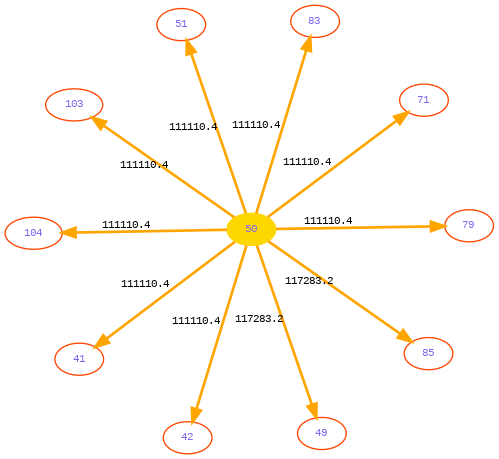

In [18]:
path1 = bfs_first_height_max_heap(G1, nodo)
print(path1)

[49, 85, 41, 42, 51, 71, 79, 83, 103, 104]


En la imagen anterior se muestra el grafo resultante luego de filtrar por género y seleccionar la música ubicado en el nodo 50. Alrededor del nodo 50 se muestra los nodos vecinos y como máximo son seleccionados los 10 con mayor puntaje.

#Obtención del grafo resultante luego de filtrar por año y seleccionar el nodo 50


In [17]:
connected_nodes2 = bfs_first_height_max_heap(G2, nodo)
connected_nodes2.insert(0, nodo)  # Insertar el nodo s al inicio de la lista

graph = drawG_am(G2, connected_nodes2, weighted=True)
graph.format = "png"  # Establecer el formato de salida como PNG
graph.render(filename="grafoResultantePorAnio", view=True)

'grafoResultantePorAnio.png'

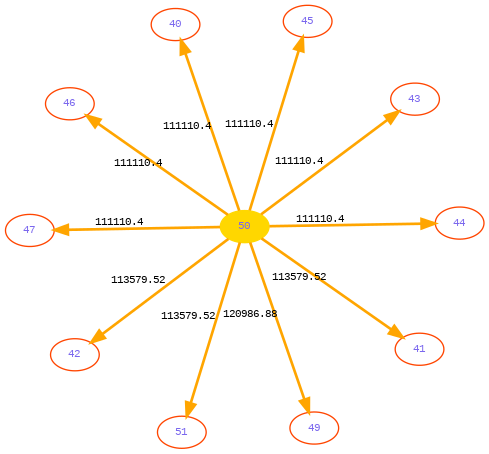

In [19]:
path2 = bfs_first_height_max_heap(G2, nodo)
print(path2)

[49, 41, 42, 51, 40, 43, 44, 45, 46, 47]


#Obtención del grafo resultante luego de filtrar por tópico y seleccionar el nodo 50

In [23]:
connected_nodes3 = bfs_first_height_max_heap(G3, nodo)
connected_nodes3.insert(0, nodo)  # Insertar el nodo s al inicio de la lista

graph = drawG_am(G3, connected_nodes3, weighted=True)
graph.format = "png"  # Establecer el formato de salida como PNG
graph.render(filename="grafoResultantePorTopic", view=True)

'grafoResultantePorTopic.png'

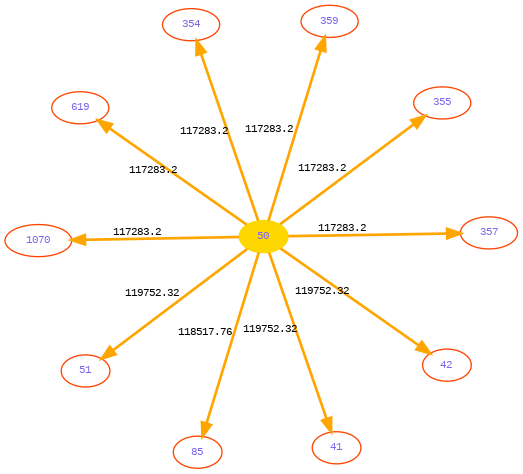

In [21]:
path3 = bfs_first_height_max_heap(G3, nodo)
print(path3)

[41, 42, 51, 85, 354, 355, 357, 359, 619, 1070]


#Obtención del grafo resultante luego de filtrar por Artista y seleccionar el nodo 50

In [26]:
connected_nodes4 = bfs_first_height_max_heap(G4, nodo)
connected_nodes4.insert(0, nodo)  # Insertar el nodo s al inicio de la lista

graph = drawG_am(G4, connected_nodes4, weighted=True)
graph.format = "png"  # Establecer el formato de salida como PNG
graph.render(filename="grafoResultantePorArtist", view=True)

'grafoResultantePorArtist.png'

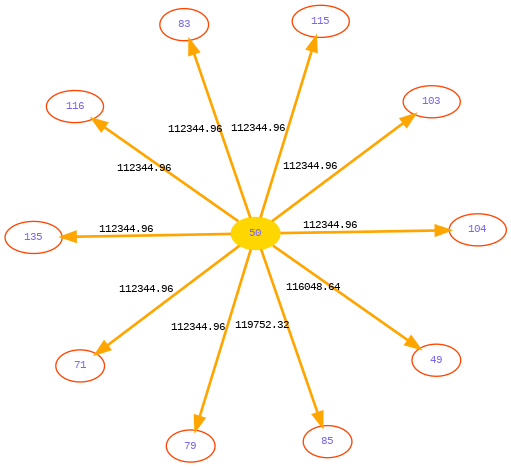

In [25]:
path4 = bfs_first_height_max_heap(G4, nodo)
print(path4)

[85, 49, 71, 79, 83, 103, 104, 115, 116, 135]


#Imprimmos los 4 caminos generados por los 4 filtros y observamos que el resultado es diferente. Esto debido a que ciertas músicas están relacionadas de la forma en que se eligió filtrar

In [27]:
path1 = bfs_first_height_max_heap(G1, nodo)
print(path1)
path2 = bfs_first_height_max_heap(G2, nodo)
print(path2)
path3 = bfs_first_height_max_heap(G3, nodo)
print(path3)
path4 = bfs_first_height_max_heap(G4, nodo)
print(path4)

[49, 85, 41, 42, 51, 71, 79, 83, 103, 104]
[49, 41, 42, 51, 40, 43, 44, 45, 46, 47]
[41, 42, 51, 85, 354, 355, 357, 359, 619, 1070]
[85, 49, 71, 79, 83, 103, 104, 115, 116, 135]
